### Check how many matching captions found

total_match_ct: 216809
len(lines): 199


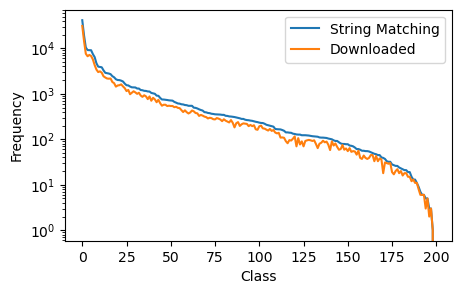

In [6]:
import json

dataset_name = 'semi-aves'
fn = f'dataset/{dataset_name}/{dataset_name}_class_frequency-LAION400M.json'

info = json.load(open(fn))

match_ct = {}
total_match_ct = 0
for k, v in info.items():
    match_ct[int(k)] = {}
    match_ct[int(k)]['match_ct']=(v['actual_freq'])
    match_ct[int(k)]['download_ct'] = 0
    total_match_ct += v['actual_freq']
print(f'total_match_ct: {total_match_ct}')

# downloaded ct
with open('download_ct.txt') as f:
    lines = f.readlines()
print('len(lines):', len(lines))
for line in lines:
    class_id = int(line.split(' ')[1])
    ct = int(line.split(' ')[3])
    match_ct[class_id]['download_ct'] = ct

# print(match_ct)


# sort the match_ct by the actual frequency
match_ct = dict(sorted(match_ct.items(), key=lambda x: x[1]['match_ct'], reverse=True))

match_ct_list = []
download_ct_list = []
for k, v in match_ct.items():
    # print(k, v)
    match_ct_list.append(v['match_ct'])
    download_ct_list.append(v['download_ct'])

# plot the frequency curve, x is the classesm, y is the frequency
import matplotlib.pyplot as plt
import numpy as np

match_ct_array = np.array(match_ct_list)
download_ct_array = np.array(download_ct_list)

x = np.arange(len(match_ct))

# set figure size
plt.figure(figsize=(5, 3))
plt.plot(x, match_ct_array, label='String Matching')
plt.plot(x, download_ct_array, label='Downloaded')
plt.yscale('log')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend()
plt.show()